<a href="https://colab.research.google.com/github/Francho03/Praca-licencjacka/blob/main/codes/Analiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [38]:
from google.colab import drive

In [39]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# Wczytanie danych

In [40]:

sprawozdanie_przemoc = pd.read_excel('/content/drive/MyDrive/praca_licencjacka/Sprawozdanie_2014_2023_zagregowane.xlsx',dtype={"keso": str})
dane_korelujace = pd.read_excel('/content/drive/MyDrive/praca_licencjacka/Dane korelujace/dane_korelujace.xlsx',  dtype={"kod": str})
odsetki=pd.read_excel("/content/drive/MyDrive/praca_licencjacka/Sprawozdanie_przemoc_2014_2023_odsetek_ludnosci.xlsx",dtype={"kod": str})
odsetki

,woj,pow,rok,kod,odsetek_ogol,odsetek_kobiety,odsetek_mezczyzni,odsetek_dzieci,liczba_ludnosci,liczba_ludnosci_mezczyzni,liczba_ludnosci_kobiety,liczba_dzieci
0,dolnośląskie,bolesławiecki,2023,0201000,0.562529,0.650874,0.223635,0.601573,87640,42480,45170,17288
1,dolnośląskie,dzierżoniowski,2023,0202000,0.424319,0.433387,0.057906,0.979072,94740,44900,49840,16342
2,dolnośląskie,górowski,2023,0204000,0.841035,1.289731,0.142857,0.610329,32460,16100,16360,6390
3,dolnośląskie,głogowski,2023,0203000,0.905456,0.758715,0.174970,2.150601,85040,41150,43890,16972
4,dolnośląskie,jaworski,2023,0205000,0.260538,0.386052,0.034602,0.248307,47210,23120,24090,8860
...,...,...,...,...,...,...,...,...,...,...,...,...
3795,świętokrzyskie,sandomierski,2014,2609000,0.246138,NaN,NaN,NaN,79630,38880,40750,15416
3796,świętokrzyskie,skarżyski,2014,2610000,0.276883,NaN,NaN,NaN,77650,37410,40240,13343
3797,świętokrzyskie,starachowicki,2014,2611000,0.734817,NaN,NaN,NaN,92540,44910,47630,17386
3798,świętokrzyskie,staszowski,2014,2612000,0.612384,NaN,NaN,NaN,73320,36400,36920,15217


In [41]:
sprawozdanie_przemoc["pow"].nunique()
dane_korelujace["pow"].nunique()

370

In [42]:
print("sprawozdanie_przemoc rows per powiat:")
print(sprawozdanie_przemoc["pow"].value_counts().describe())

print("\ndane_korelujace rows per powiat:")
print(dane_korelujace["pow"].value_counts().describe())

sprawozdanie_przemoc rows per powiat:
count    370.000000
mean      10.297297
std        1.700707
min       10.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       20.000000
Name: count, dtype: float64

dane_korelujace rows per powiat:
count    370.000000
mean      10.270270
std        1.623817
min       10.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       20.000000
Name: count, dtype: float64


In [43]:
expected_rows_per_pow = 10


spra_counts = sprawozdanie_przemoc["pow"].value_counts()
kor_counts = dane_korelujace["pow"].value_counts()

print(" Powiats in dane_korelujace with < 10 rows:")
print(kor_counts[kor_counts < expected_rows_per_pow])

print("\n Powiats in sprawozdanie_przemoc with ≠ 10 rows:")
print(spra_counts[spra_counts != expected_rows_per_pow])

 Powiats in dane_korelujace with < 10 rows:
Series([], Name: count, dtype: int64)

 Powiats in sprawozdanie_przemoc with ≠ 10 rows:
pow
bielski        20
brzeski        20
ostrowski      20
nowodworski    20
krośnieński    20
tomaszowski    20
opolski        20
chełmski       20
świdnicki      20
średzki        20
grodziski      20
Name: count, dtype: int64


In [44]:
chelmski_df = sprawozdanie_przemoc[sprawozdanie_przemoc["pow"] == "chełmski"]
rest_df = sprawozdanie_przemoc[sprawozdanie_przemoc["pow"] != "chełmski"]


In [45]:

numeric_cols = chelmski_df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'rok']

chelmski_agg = chelmski_df.groupby(["pow", "rok"]).agg({
    **{col: 'sum' for col in numeric_cols},
    'woj': 'first',
    'keso': 'first'
}).reset_index()


In [46]:
sprawozdanie_cleaned = pd.concat([rest_df, chelmski_agg], ignore_index=True)

In [47]:
sprawozdanie_cleaned = sprawozdanie_cleaned.sort_values(by=["rok", "woj"], ascending=[False, True])

In [48]:
sprawozdanie_przemoc=sprawozdanie_cleaned
sprawozdanie_przemoc

,woj,pow,rok,keso,liczba_proc_nk_a,liczba_proc_nk_c,rodziny_wszczete,liczba_osob_ogol,liczba_osob_kobiety,liczba_osob_mezczyzni,liczba_osob_dzieci
0,dolnośląskie,bolesławiecki,2023,300201011000,42,181,383,493,294.0,95.0,104.0
1,dolnośląskie,dzierżoniowski,2023,300202011000,65,132,291,402,216.0,26.0,160.0
2,dolnośląskie,górowski,2023,300204013000,23,56,125,273,211.0,23.0,39.0
3,dolnośląskie,głogowski,2023,200203000000,36,199,428,770,333.0,72.0,365.0
4,dolnośląskie,jaworski,2023,300205023000,12,59,119,123,93.0,8.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
3785,świętokrzyskie,sandomierski,2014,302609022000,8,220,145,196,NaN,NaN,NaN
3786,świętokrzyskie,skarżyski,2014,302610022000,32,62,166,215,NaN,NaN,NaN
3787,świętokrzyskie,starachowicki,2014,302611022000,4,80,218,680,NaN,NaN,NaN
3788,świętokrzyskie,staszowski,2014,302612012000,21,199,216,449,NaN,NaN,NaN


In [49]:
manual_corrections = {
    "m. walbrzych od 2013": "m. walbrzych",
}

In [50]:

sprawozdanie_normalized_corrected = {
    manual_corrections.get(n, n) for n in sprawozdanie_przemoc["pow"]
}
kor_normalized_corrected = {
    manual_corrections.get(n, n) for n in dane_korelujace["pow"]
}


final_missing_in_kor = sprawozdanie_normalized_corrected - kor_normalized_corrected
final_missing_in_sprawozdanie = kor_normalized_corrected - sprawozdanie_normalized_corrected

print(" After manual correction:")
print(" Still missing in korelacja:", final_missing_in_kor)
print(" Still missing in Sprawozdanie:", final_missing_in_sprawozdanie)

 After manual correction:
 Still missing in korelacja: {'m. Gdynia', 'm. Lublin', 'myszkowski', 'lubelski', 'chojnicki', 'otwocki', 'szczecinecki', 'mławski', 'sępoleński', 'pabianicki', 'zielonogórski', 'zawierciański', 'sandomierski', 'zwoleński', 'm. Kraków', 'm. Szczecin', 'przemyski', 'poznański', 'ciechanowski', 'kolski', 'kaliski', 'lwówecki', 'wrocławski', 'wąbrzeski', 'nowosądecki', 'świdwiński', 'kluczborski', 'm. Siedlce', 'sochaczewski', 'brodnicki', 'm. Biała Podlaska', 'żagański', 'bolesławiecki', 'bielski', 'przysuski', 'grudziądzki', 'iławski', 'suwalski', 'świdnicki', 'm. Przemyśl', 'siemiatycki', 'm. Kielce', 'gostyniński', 'm. Olsztyn', 'wodzisławski', 'żywiecki', 'białostocki', 'm. Nowy Sącz', 'm. Tarnobrzeg', 'tarnobrzeski', 'm. Gorzów Wielkopolski', 'm. Bytom', 'szczycieński', 'skierniewicki', 'łańcucki', 'stargardzki', 'krotoszyński', 'łęczyński', 'pszczyński', 'mogileński', 'm. Częstochowa', 'leszczyński', 'pyrzycki', 'wysokomazowiecki', 'tarnowski', 'słupski', 

In [51]:
dane_korelujace

,kod,pow,rok,odsetek_bezrobotnych_dlugotrwalych,wielkosc_wynagrodzenia,odsetek_rozwodow,liczba_osob_na_1_izbe,przecietna_powierzchnia_mieszkania_na_1_osobe
0,0201000,Powiat bolesławiecki,2014,0.4637,3422,0.3787,0.72,26.5
1,0202000,Powiat dzierżoniowski,2014,0.4751,3299,0.4310,0.76,24.0
2,0203000,Powiat głogowski,2014,0.5690,3460,0.4189,0.75,23.2
3,0204000,Powiat górowski,2014,0.6394,3142,0.3918,0.77,25.0
4,0205000,Powiat jaworski,2014,0.5921,3142,0.3508,0.75,25.2
...,...,...,...,...,...,...,...,...
3795,3217000,Powiat wałecki,2023,0.4854,6651,0.3410,0.66,28.6
3796,3218000,Powiat łobeski,2023,0.5389,6257,0.4160,0.67,27.5
3797,3261000,Powiat m. Koszalin,2023,0.4891,6828,0.4439,0.60,30.6
3798,3262000,Powiat m. Szczecin,2023,0.3982,7933,0.3940,0.59,30.9


In [52]:

dane_korelujace["woj_kod"] = dane_korelujace["kod"].astype(str).str[:2]

wojewodztwa_map = {
    "02": "dolnośląskie",
    "04": "kujawsko - pomorskie",
    "06": "lubelskie",
    "08": "lubuskie",
    "10": "łódzkie",
    "12": "małopolskie",
    "14": "mazowieckie",
    "16": "opolskie",
    "18": "podkarpackie",
    "20": "podlaskie",
    "22": "pomorskie",
    "24": "śląskie",
    "26": "świętokrzyskie",
    "28": "warmińsko-mazurskie",
    "30": "wielkopolskie",
    "32": "zachodniopomorskie"
}

dane_korelujace["woj"] = dane_korelujace["woj_kod"].map(wojewodztwa_map)

In [53]:
dane_korelujace

,kod,pow,rok,odsetek_bezrobotnych_dlugotrwalych,wielkosc_wynagrodzenia,odsetek_rozwodow,liczba_osob_na_1_izbe,przecietna_powierzchnia_mieszkania_na_1_osobe,woj_kod,woj
0,0201000,Powiat bolesławiecki,2014,0.4637,3422,0.3787,0.72,26.5,02,dolnośląskie
1,0202000,Powiat dzierżoniowski,2014,0.4751,3299,0.4310,0.76,24.0,02,dolnośląskie
2,0203000,Powiat głogowski,2014,0.5690,3460,0.4189,0.75,23.2,02,dolnośląskie
3,0204000,Powiat górowski,2014,0.6394,3142,0.3918,0.77,25.0,02,dolnośląskie
4,0205000,Powiat jaworski,2014,0.5921,3142,0.3508,0.75,25.2,02,dolnośląskie
...,...,...,...,...,...,...,...,...,...,...
3795,3217000,Powiat wałecki,2023,0.4854,6651,0.3410,0.66,28.6,32,zachodniopomorskie
3796,3218000,Powiat łobeski,2023,0.5389,6257,0.4160,0.67,27.5,32,zachodniopomorskie
3797,3261000,Powiat m. Koszalin,2023,0.4891,6828,0.4439,0.60,30.6,32,zachodniopomorskie
3798,3262000,Powiat m. Szczecin,2023,0.3982,7933,0.3940,0.59,30.9,32,zachodniopomorskie


In [54]:
sprawozdanie_przemoc["pow"].nunique()
dane_korelujace["pow"].nunique()

370

In [55]:
print("sprawozdanie_przemoc rows per powiat:")
print(sprawozdanie_przemoc["pow"].value_counts().describe())

print("\ndane_korelujace rows per powiat:")
print(dane_korelujace["pow"].value_counts().describe())

sprawozdanie_przemoc rows per powiat:
count    370.000000
mean      10.270270
std        1.623817
min       10.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       20.000000
Name: count, dtype: float64

dane_korelujace rows per powiat:
count    370.000000
mean      10.270270
std        1.623817
min       10.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       20.000000
Name: count, dtype: float64


In [56]:

mask = (sprawozdanie_przemoc["pow"] == "chełmski") & (sprawozdanie_przemoc["rok"] == 2014)


sprawozdanie_przemoc.loc[mask] = sprawozdanie_przemoc.loc[mask].replace(0, np.nan)

In [57]:
sprawozdanie_przemoc[sprawozdanie_przemoc["pow"] == "chełmski"]

,woj,pow,rok,keso,liczba_proc_nk_a,liczba_proc_nk_c,rodziny_wszczete,liczba_osob_ogol,liczba_osob_kobiety,liczba_osob_mezczyzni,liczba_osob_dzieci
3799,lubelskie,chełmski,2023,300603022000,27,86,175,279,150.0,16.0,113.0
3798,lubelskie,chełmski,2022,300603022000,15,84,164,249,149.0,21.0,79.0
3797,lubelskie,chełmski,2021,300603022000,131,123,197,354,205.0,61.0,88.0
3796,lubelskie,chełmski,2020,300603022000,33,167,205,438,263.0,65.0,110.0
3795,lubelskie,chełmski,2019,300603022000,35,176,232,466,249.0,75.0,142.0
3794,lubelskie,chełmski,2018,300603022000,27,179,243,629,343.0,56.0,230.0
3793,lubelskie,chełmski,2017,300603022000,31,198,277,656,381.0,56.0,219.0
3792,lubelskie,chełmski,2016,300603022000,40,174,195,443,260.0,50.0,133.0
3791,lubelskie,chełmski,2015,300603022000,42,194,158,355,229.0,53.0,73.0
3790,lubelskie,chełmski,2014,300603022000,32,167,188,321,NaN,NaN,NaN


In [58]:
sprawozdanie_przemoc.to_excel("/content/drive/MyDrive/praca_licencjacka/Sprawozdanie_2014_2023_zagregowane_corrected.xlsx", sheet_name= "Sprawozdanie_2014_2023_zagregowane_corrected.xlsx" ,index=False)

In [ ]:
with pd.ExcelWriter('Sprawozdanie_przemoc_2014_2023_zagregowane_corrected.xlsx') as writer:
 sprawozdanie_przemoc .to_excel(writer, index=False, sheet_name='Sprawozdanie_przemoc_2014_2023_zagregowane_corrected')

In [ ]:
sprawozdanie_przemoc.to_csv('Sprawozdanie_przemoc_2014_2023_zagregowane_corrected.csv', index=False)

In [59]:

dane_korelujace['pow'] = dane_korelujace['pow'].str.replace('^Powiat ', '', regex=True).str.lower()


sprawozdanie_przemoc['pow'] = sprawozdanie_przemoc['pow'].str.lower()

In [60]:

sprawozdanie_przemoc['keso'] = sprawozdanie_przemoc['keso'].astype(str)
dane_korelujace['kod'] = dane_korelujace['kod'].astype(str)


sprawozdanie_przemoc['keso_4digit'] = sprawozdanie_przemoc['keso'].str[2:6]


dane_korelujace['kod_4digit'] = dane_korelujace['kod'].str[:4]
dane_korelujace = dane_korelujace[dane_korelujace['kod_4digit'].str.match(r'^\d{4}$')]
odsetki['kod_4digit'] = odsetki['kod'].str[:4]
odsetki = odsetki[odsetki['kod_4digit'].str.match(r'^\d{4}$')]

merged_df = pd.merge(
    sprawozdanie_przemoc,
    dane_korelujace,
    left_on=['keso_4digit', 'rok'],
    right_on=['kod_4digit', 'rok'],
    how='inner'
)
merged_df= pd.merge(merged_df,odsetki,on=['kod_4digit','rok'],how='inner')
merged_df

,woj_x,pow_x,rok,keso,liczba_proc_nk_a,liczba_proc_nk_c,rodziny_wszczete,liczba_osob_ogol,liczba_osob_kobiety,liczba_osob_mezczyzni,...,pow,kod_y,odsetek_ogol,odsetek_kobiety,odsetek_mezczyzni,odsetek_dzieci,liczba_ludnosci,liczba_ludnosci_mezczyzni,liczba_ludnosci_kobiety,liczba_dzieci
0,dolnośląskie,bolesławiecki,2023,300201011000,42,181,383,493,294.0,95.0,...,bolesławiecki,0201000,0.562529,0.650874,0.223635,0.601573,87640,42480,45170,17288
1,dolnośląskie,dzierżoniowski,2023,300202011000,65,132,291,402,216.0,26.0,...,dzierżoniowski,0202000,0.424319,0.433387,0.057906,0.979072,94740,44900,49840,16342
2,dolnośląskie,górowski,2023,300204013000,23,56,125,273,211.0,23.0,...,górowski,0204000,0.841035,1.289731,0.142857,0.610329,32460,16100,16360,6390
3,dolnośląskie,głogowski,2023,200203000000,36,199,428,770,333.0,72.0,...,głogowski,0203000,0.905456,0.758715,0.174970,2.150601,85040,41150,43890,16972
4,dolnośląskie,jaworski,2023,300205023000,12,59,119,123,93.0,8.0,...,jaworski,0205000,0.260538,0.386052,0.034602,0.248307,47210,23120,24090,8860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,świętokrzyskie,sandomierski,2014,302609022000,8,220,145,196,NaN,NaN,...,sandomierski,2609000,0.246138,NaN,NaN,NaN,79630,38880,40750,15416
3796,świętokrzyskie,skarżyski,2014,302610022000,32,62,166,215,NaN,NaN,...,skarżyski,2610000,0.276883,NaN,NaN,NaN,77650,37410,40240,13343
3797,świętokrzyskie,starachowicki,2014,302611022000,4,80,218,680,NaN,NaN,...,starachowicki,2611000,0.734817,NaN,NaN,NaN,92540,44910,47630,17386
3798,świętokrzyskie,staszowski,2014,302612012000,21,199,216,449,NaN,NaN,...,staszowski,2612000,0.612384,NaN,NaN,NaN,73320,36400,36920,15217


In [61]:
result = merged_df[['woj_x', 'pow_x', 'rok', 'kod_x','odsetek_ogol','odsetek_kobiety','odsetek_mezczyzni','odsetek_dzieci','liczba_proc_nk_a','liczba_proc_nk_c','rodziny_wszczete','liczba_osob_ogol','liczba_osob_kobiety','liczba_osob_mezczyzni','liczba_osob_dzieci','odsetek_bezrobotnych_dlugotrwalych','wielkosc_wynagrodzenia','odsetek_rozwodow','liczba_osob_na_1_izbe','przecietna_powierzchnia_mieszkania_na_1_osobe']]

In [62]:
result = result.rename(columns={"pow_x": "pow"})
result = result.rename(columns={"woj_x": "woj"})
result = result.rename(columns={"kod_x": "kod"})

In [63]:
result

,woj,pow,rok,kod,odsetek_ogol,odsetek_kobiety,odsetek_mezczyzni,odsetek_dzieci,liczba_proc_nk_a,liczba_proc_nk_c,rodziny_wszczete,liczba_osob_ogol,liczba_osob_kobiety,liczba_osob_mezczyzni,liczba_osob_dzieci,odsetek_bezrobotnych_dlugotrwalych,wielkosc_wynagrodzenia,odsetek_rozwodow,liczba_osob_na_1_izbe,przecietna_powierzchnia_mieszkania_na_1_osobe
0,dolnośląskie,bolesławiecki,2023,0201000,0.562529,0.650874,0.223635,0.601573,42,181,383,493,294.0,95.0,104.0,0.2585,6871,0.3928,0.61,32.4
1,dolnośląskie,dzierżoniowski,2023,0202000,0.424319,0.433387,0.057906,0.979072,65,132,291,402,216.0,26.0,160.0,0.3396,6459,0.4966,0.65,28.7
2,dolnośląskie,górowski,2023,0204000,0.841035,1.289731,0.142857,0.610329,23,56,125,273,211.0,23.0,39.0,0.5330,6060,0.3388,0.64,30.2
3,dolnośląskie,głogowski,2023,0203000,0.905456,0.758715,0.174970,2.150601,36,199,428,770,333.0,72.0,365.0,0.4918,6660,0.3771,0.65,27.9
4,dolnośląskie,jaworski,2023,0205000,0.260538,0.386052,0.034602,0.248307,12,59,119,123,93.0,8.0,22.0,0.5452,7059,0.3684,0.64,29.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,świętokrzyskie,sandomierski,2014,2609000,0.246138,NaN,NaN,NaN,8,220,145,196,NaN,NaN,NaN,0.6265,3526,0.2105,0.79,26.2
3796,świętokrzyskie,skarżyski,2014,2610000,0.276883,NaN,NaN,NaN,32,62,166,215,NaN,NaN,NaN,0.6417,3395,0.3919,0.71,25.0
3797,świętokrzyskie,starachowicki,2014,2611000,0.734817,NaN,NaN,NaN,4,80,218,680,NaN,NaN,NaN,0.5965,3199,0.3761,0.79,23.7
3798,świętokrzyskie,staszowski,2014,2612000,0.612384,NaN,NaN,NaN,21,199,216,449,NaN,NaN,NaN,0.4695,3589,0.2807,0.77,26.3


In [ ]:
with pd.ExcelWriter('Sprawozdanie_przemoc_2014_2023_korelacja.xlsx') as writer:
 result.to_excel(writer, index=False, sheet_name='Sprawozdanie_przemoc_2014_2023_korelacja')

In [ ]:
result.to_csv('Sprawozdanie_przemoc_2014_2023_korelacja.csv', index=False)

In [ ]:
result.to_excel("/content/drive/MyDrive/praca_licencjacka/Sprawozdanie_przemoc_2014_2023_korelacja.xlsx", sheet_name= "Sprawozdanie_przemoc_2014_2023_korelacja.xlsx" ,index=False)

# Korelacje wykresy

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro, normaltest
import warnings

In [29]:


warnings.filterwarnings("ignore")

merged_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_korelacja.xlsx", dtype={"kod": str})
merged_df['teryt_4'] = merged_df['kod'].str[:4]

pct_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_odsetek_ludnosci.xlsx", dtype={"kod": str})
pct_df['teryt_4'] = pct_df['kod'].str[:4]


df = pd.merge(merged_df, pct_df, on=["rok", "kod", "teryt_4"], suffixes=('', '_pct'))



In [30]:

var1 = 'liczba_proc_nk_a'
var2 = 'odsetek_rozwodow'
alpha = 0.05


In [31]:
def analyze_correlation_with_diagnostics(x, y, alpha=0.05):
    results = {
        'n': len(x),
        'missing_values': x.isnull().sum() + y.isnull().sum(),
        'outliers_x': 0,
        'outliers_y': 0,
        'normality_x': None,
        'normality_y': None,
        'recommended_test': None,
        'pearson_r': None,
        'pearson_p': None,
        'spearman_rho': None,
        'spearman_p': None,
        'interpretation': []
    }

    valid_data = pd.DataFrame({'x': x, 'y': y}).dropna()
    if len(valid_data) < 3:
        results['interpretation'].append("Zbyt mało obserwacji do analizy")
        return results

    x_clean, y_clean = valid_data['x'], valid_data['y']

    def count_outliers(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        return ((data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)).sum()

    results['outliers_x'] = count_outliers(x_clean)
    results['outliers_y'] = count_outliers(y_clean)

    if len(x_clean) >= 8:
        try:
            if len(x_clean) <= 5000:
                _, p_x = shapiro(x_clean)
                _, p_y = shapiro(y_clean)
            else:
                _, p_x = normaltest(x_clean)
                _, p_y = normaltest(y_clean)
            results['normality_x'] = p_x
            results['normality_y'] = p_y
        except:
            pass

    if x_clean.std() == 0 or y_clean.std() == 0:
        results['interpretation'].append("Brak zmienności w jednej ze zmiennych")
        return results

    results['pearson_r'], results['pearson_p'] = pearsonr(x_clean, y_clean)
    results['spearman_rho'], results['spearman_p'] = spearmanr(x_clean, y_clean)

    normal_x = results['normality_x'] is not None and results['normality_x'] > alpha
    normal_y = results['normality_y'] is not None and results['normality_y'] > alpha
    few_outliers = results['outliers_x'] <= len(x_clean) * 0.05 and results['outliers_y'] <= len(y_clean) * 0.05

    if normal_x and normal_y and few_outliers and len(x_clean) >= 30:
        results['recommended_test'] = 'pearson'
        r, p = results['pearson_r'], results['pearson_p']
        results['interpretation'].append("Rekomendacja: test Pearsona (normalność, mało wartości odstających)")
    else:
        results['recommended_test'] = 'spearman'
        r, p = results['spearman_rho'], results['spearman_p']
        reasons = []
        if not normal_x or not normal_y: reasons.append("rozkład nienormalny")
        if not few_outliers: reasons.append("dużo wartości odstających")
        if len(x_clean) < 30: reasons.append("mała próbka")
        results['interpretation'].append("Rekomendacja: test Spearmana (" + ", ".join(reasons) + ")")

    results['recommended_r'] = r
    results['recommended_p'] = p

    strength = abs(r)
    if strength < 0.1:
        description = "bardzo słaby"
    elif strength < 0.3:
        description = "słaby"
    elif strength < 0.5:
        description = "umiarkowany"
    elif strength < 0.7:
        description = "silny"
    else:
        description = "bardzo silny"
    results['interpretation'].append(f"Siła związku: {description} (|r|={strength:.3f})")

    if p < alpha:
        results['interpretation'].append(f"Związek istotny statystycznie (p={p:.4f})")
    else:
        results['interpretation'].append(f"Związek nieistotny statystycznie (p={p:.4f})")

    return results


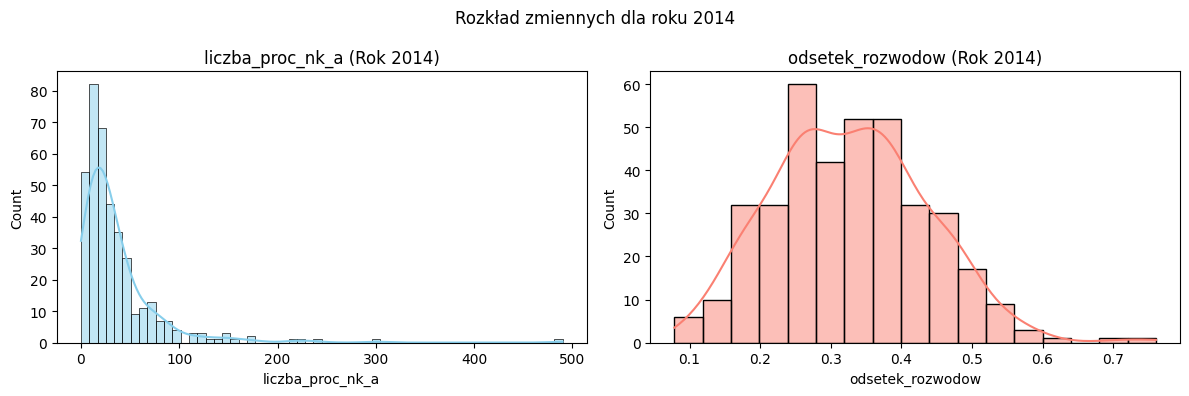

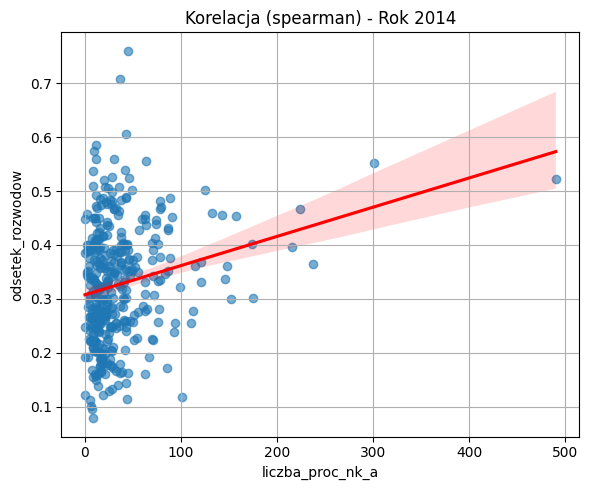

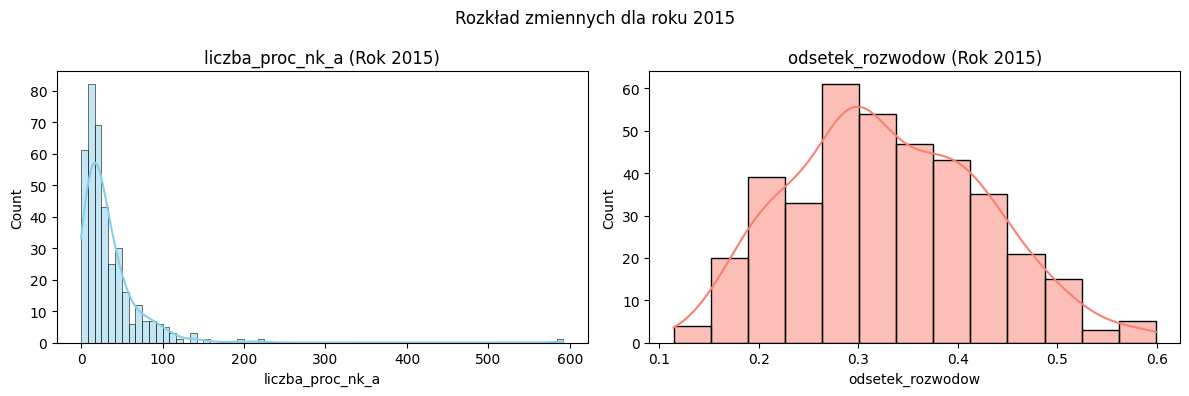

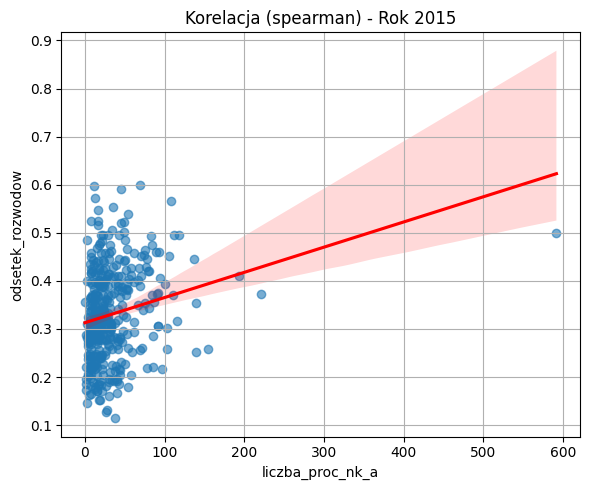

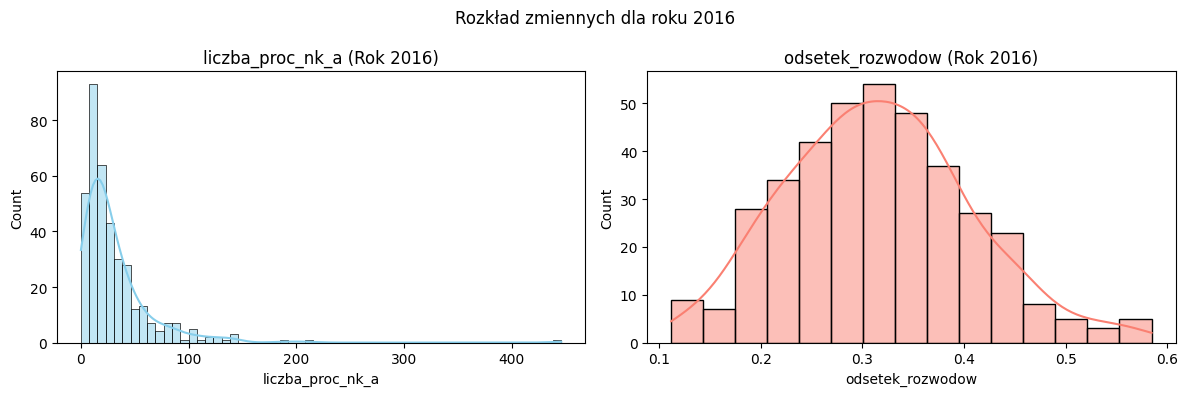

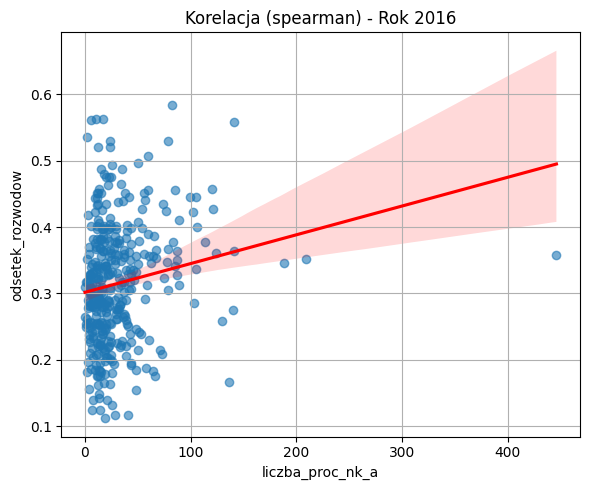

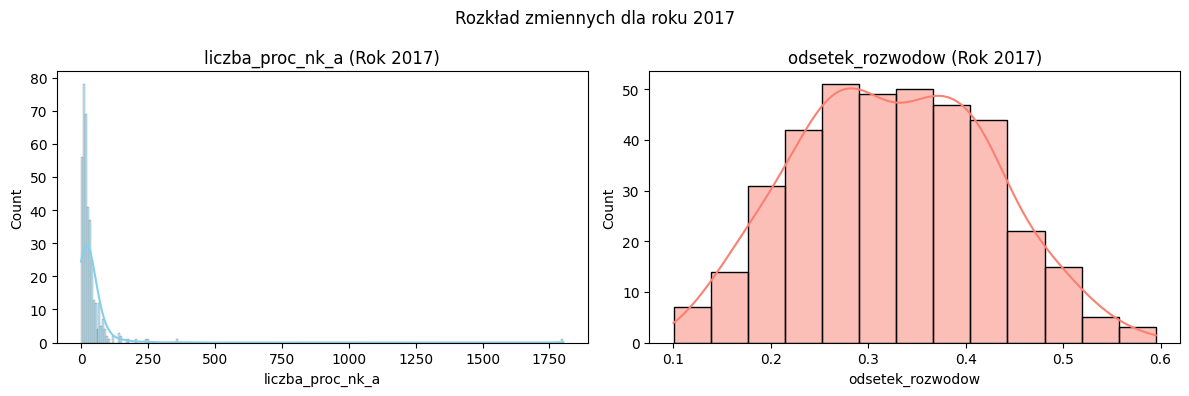

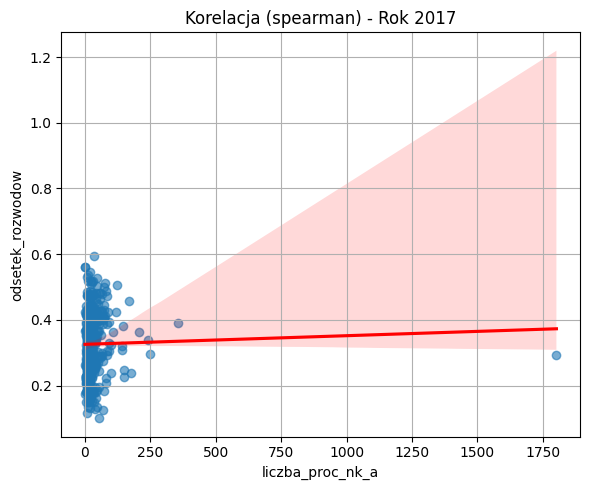

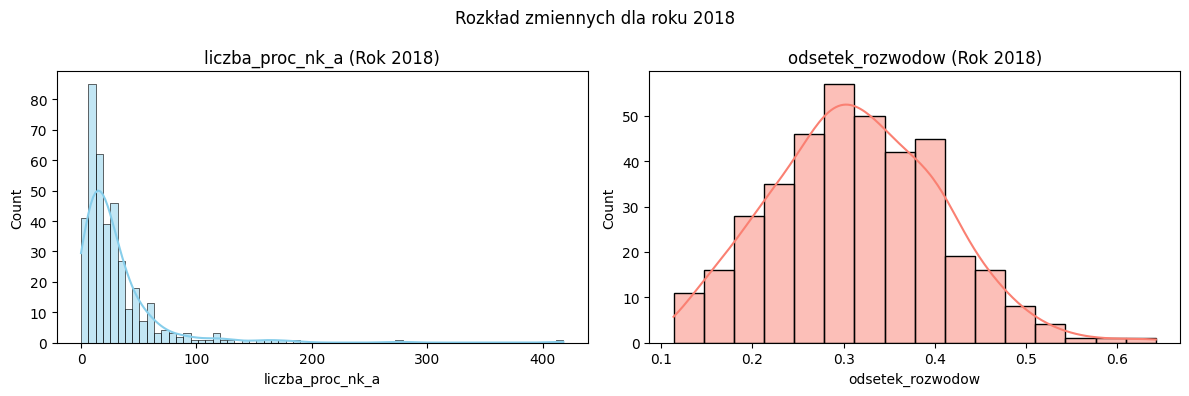

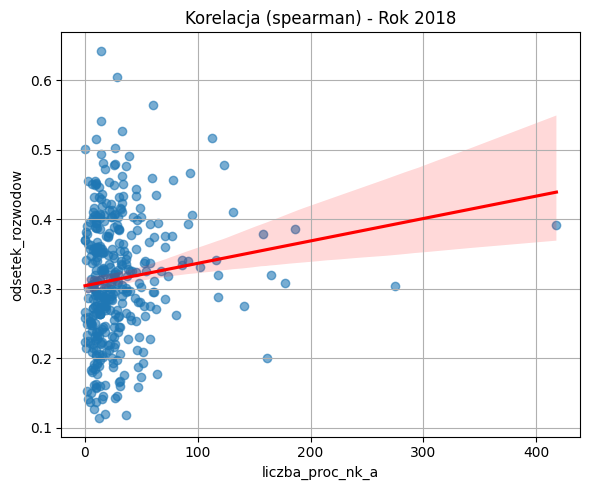

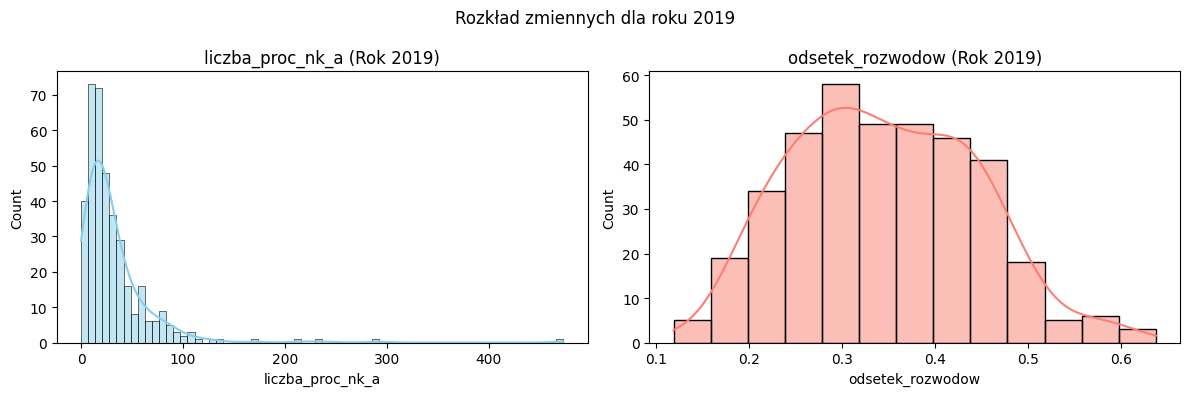

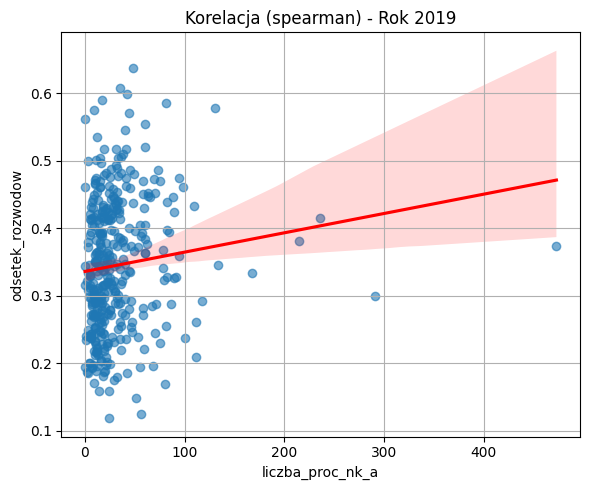

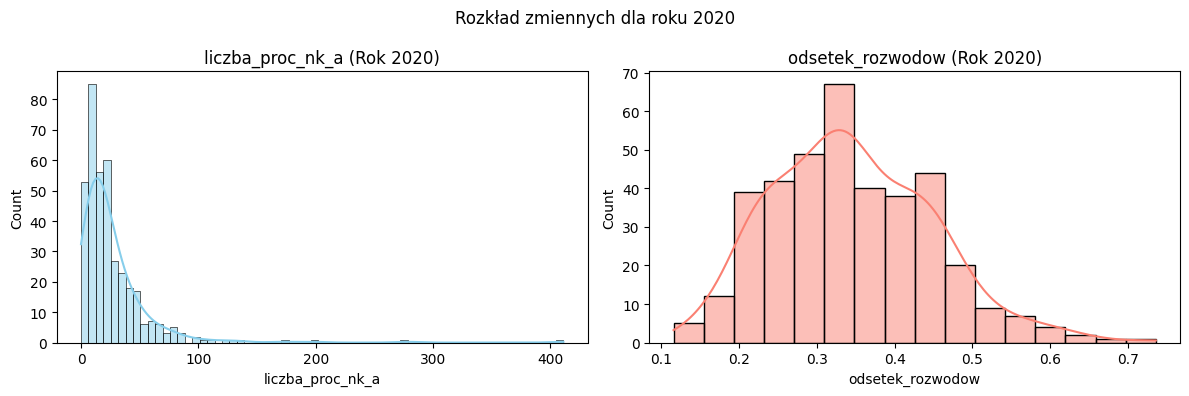

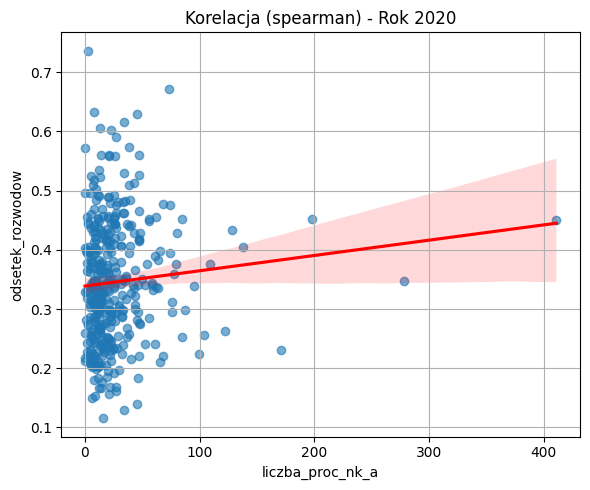

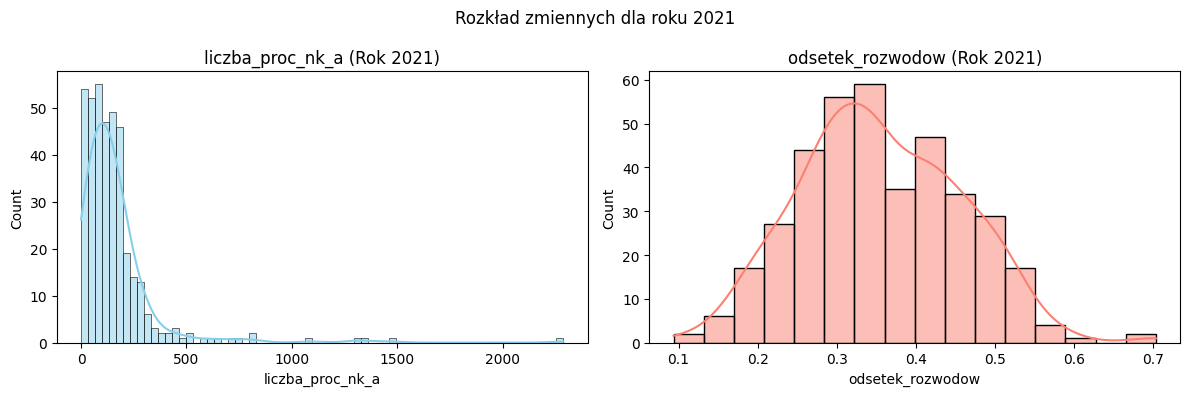

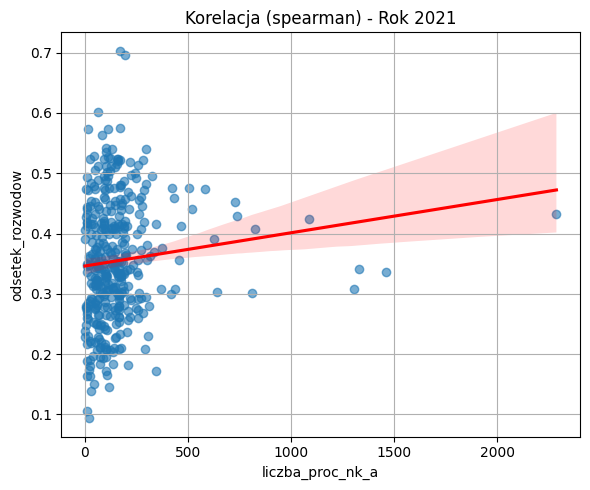

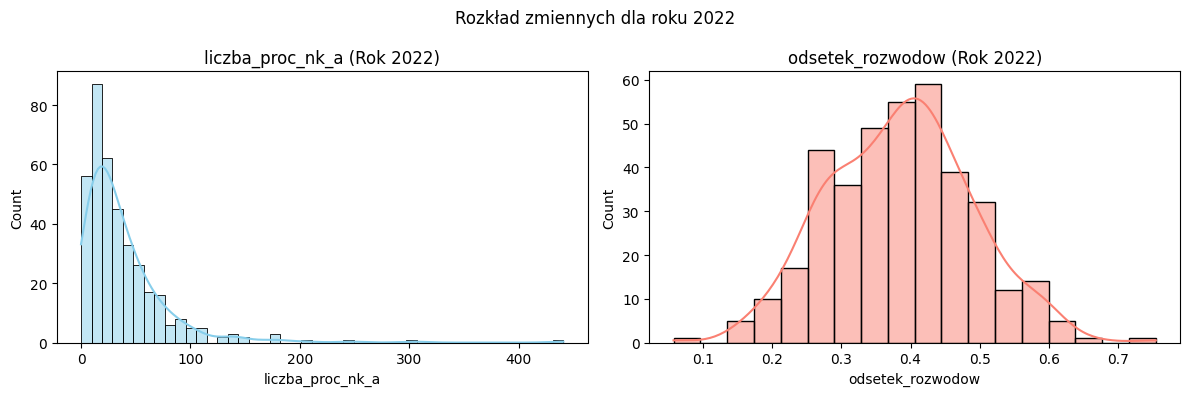

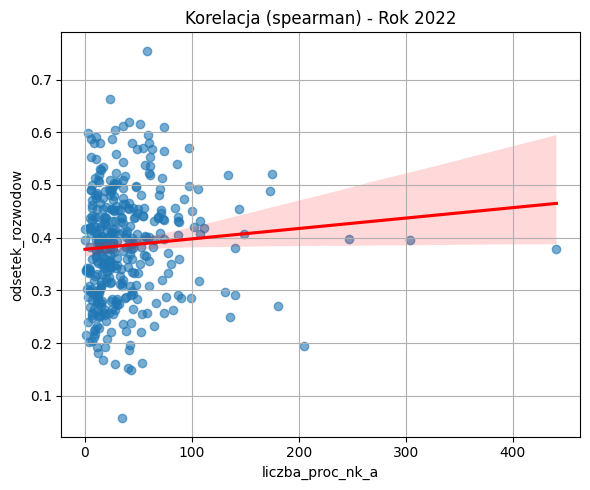

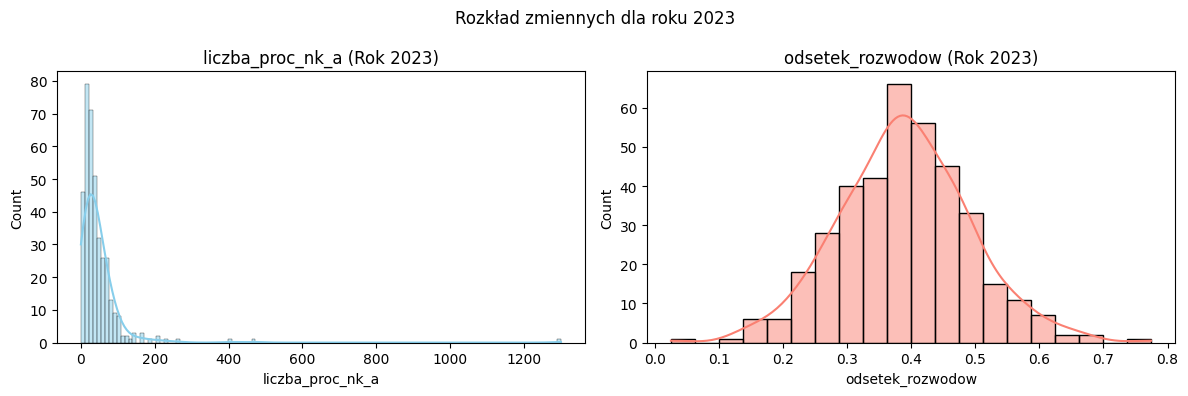

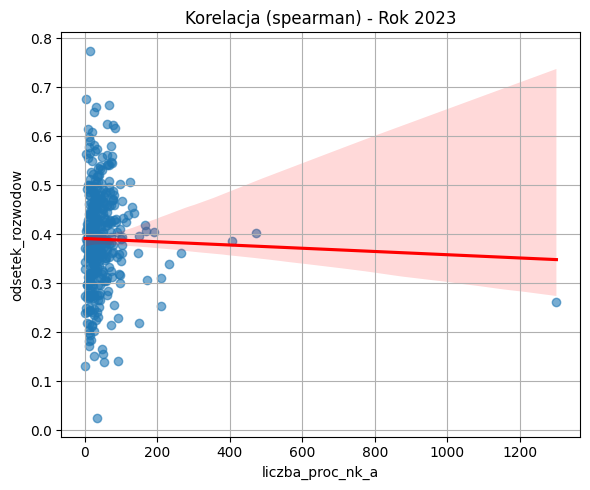

In [32]:
years = sorted(df['rok'].unique())
correlation_results = []

for year in years:
    subset = df[df['rok'] == year]
    x = subset[var1]
    y = subset[var2]

    result = analyze_correlation_with_diagnostics(x, y, alpha)
    correlation_results.append({
        "rok": year,
        "recommended_test": result['recommended_test'],
        "correlation": result['recommended_r'],
        "p_value": result['recommended_p'],
        "n": result['n'],
        "interpretation": "; ".join(result['interpretation']),
    })


    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(x, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{var1} (Rok {year})")

    sns.histplot(y, kde=True, ax=axes[1], color="salmon")
    axes[1].set_title(f"{var2} (Rok {year})")
    plt.suptitle(f"Rozkład zmiennych dla roku {year}")
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(6, 5))
    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
    plt.title(f"Korelacja ({result['recommended_test']}) - Rok {year}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [33]:
correlation_summary = pd.DataFrame(correlation_results)
correlation_summary


,rok,recommended_test,correlation,p_value,n,interpretation
0,2014,spearman,0.198871,9.500800e-05,380,Rekomendacja: test Spearmana (rozkład nienorma...
1,2015,spearman,0.261111,2.429513e-07,380,Rekomendacja: test Spearmana (rozkład nienorma...
2,2016,spearman,0.199232,9.220979e-05,380,Rekomendacja: test Spearmana (rozkład nienorma...
3,2017,spearman,0.169694,8.964095e-04,380,Rekomendacja: test Spearmana (rozkład nienorma...
4,2018,spearman,0.158446,1.947627e-03,380,Rekomendacja: test Spearmana (rozkład nienorma...
5,2019,spearman,0.204432,5.958050e-05,380,Rekomendacja: test Spearmana (rozkład nienorma...
6,2020,spearman,0.111895,2.919137e-02,380,Rekomendacja: test Spearmana (rozkład nienorma...
7,2021,spearman,0.168504,9.753764e-04,380,Rekomendacja: test Spearmana (rozkład nienorma...
8,2022,spearman,0.155141,2.424035e-03,380,Rekomendacja: test Spearmana (rozkład nienorma...
9,2023,spearman,0.157203,2.115771e-03,380,Rekomendacja: test Spearmana (rozkład nienorma...


In [34]:
for _, row in correlation_summary.iterrows():
    print(f"Rok {row['rok']} — r = {row['correlation']:.3f}, p = {row['p_value']:.4f}, test: {row['recommended_test']}")
    print(f"Interpretacja: {row['interpretation']}")
    print("-" * 80)


Rok 2014 — r = 0.199, p = 0.0001, test: spearman
Interpretacja: Rekomendacja: test Spearmana (rozkład nienormalny, dużo wartości odstających); Siła związku: słaby (|r|=0.199); Związek istotny statystycznie (p=0.0001)
--------------------------------------------------------------------------------
Rok 2015 — r = 0.261, p = 0.0000, test: spearman
Interpretacja: Rekomendacja: test Spearmana (rozkład nienormalny, dużo wartości odstających); Siła związku: słaby (|r|=0.261); Związek istotny statystycznie (p=0.0000)
--------------------------------------------------------------------------------
Rok 2016 — r = 0.199, p = 0.0001, test: spearman
Interpretacja: Rekomendacja: test Spearmana (rozkład nienormalny, dużo wartości odstających); Siła związku: słaby (|r|=0.199); Związek istotny statystycznie (p=0.0001)
--------------------------------------------------------------------------------
Rok 2017 — r = 0.170, p = 0.0009, test: spearman
Interpretacja: Rekomendacja: test Spearmana (rozkład nien

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro, normaltest
import warnings

warnings.filterwarnings("ignore")


merged_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_korelacja.xlsx", dtype={"kod": str})
merged_df['teryt_4'] = merged_df['kod'].str[:4]

pct_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_odsetek_ludnosci.xlsx", dtype={"kod": str})
pct_df['teryt_4'] = pct_df['kod'].str[:4]


df = pd.merge(merged_df, pct_df, on=["rok", "kod", "teryt_4"], suffixes=('', '_pct'))


var1 = 'odsetek_ogol'
var2 = 'liczba_osob_na_1_izbe'
alpha = 0.05


def analyze_correlation_with_diagnostics(x, y, alpha=0.05):
    results = {
        'n': len(x),
        'missing_values': x.isnull().sum() + y.isnull().sum(),
        'outliers_x': 0,
        'outliers_y': 0,
        'normality_x': None,
        'normality_y': None,
        'recommended_test': None,
        'pearson_r': None,
        'pearson_p': None,
        'spearman_rho': None,
        'spearman_p': None,
        'interpretation': []
    }

    valid_data = pd.DataFrame({'x': x, 'y': y}).dropna()
    if len(valid_data) < 3:
        results['interpretation'].append("Zbyt mało obserwacji do analizy")
        return results

    x_clean, y_clean = valid_data['x'], valid_data['y']

    def count_outliers(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        return ((data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)).sum()

    results['outliers_x'] = count_outliers(x_clean)
    results['outliers_y'] = count_outliers(y_clean)

    if len(x_clean) >= 8:
        try:
            if len(x_clean) <= 5000:
                _, p_x = shapiro(x_clean)
                _, p_y = shapiro(y_clean)
            else:
                _, p_x = normaltest(x_clean)
                _, p_y = normaltest(y_clean)
            results['normality_x'] = p_x
            results['normality_y'] = p_y
        except:
            pass

    if x_clean.std() == 0 or y_clean.std() == 0:
        results['interpretation'].append("Brak zmienności w jednej ze zmiennych")
        return results

    results['pearson_r'], results['pearson_p'] = pearsonr(x_clean, y_clean)
    results['spearman_rho'], results['spearman_p'] = spearmanr(x_clean, y_clean)

    normal_x = results['normality_x'] is not None and results['normality_x'] > alpha
    normal_y = results['normality_y'] is not None and results['normality_y'] > alpha
    few_outliers = results['outliers_x'] <= len(x_clean) * 0.05 and results['outliers_y'] <= len(y_clean) * 0.05

    if normal_x and normal_y and few_outliers and len(x_clean) >= 30:
        results['recommended_test'] = 'pearson'
        r, p = results['pearson_r'], results['pearson_p']
        results['interpretation'].append("Rekomendacja: test Pearsona (normalność, mało wartości odstających)")
    else:
        results['recommended_test'] = 'spearman'
        r, p = results['spearman_rho'], results['spearman_p']
        reasons = []
        if not normal_x or not normal_y: reasons.append("rozkład nienormalny")
        if not few_outliers: reasons.append("dużo wartości odstających")
        if len(x_clean) < 30: reasons.append("mała próbka")
        results['interpretation'].append("Rekomendacja: test Spearmana (" + ", ".join(reasons) + ")")

    results['recommended_r'] = r
    results['recommended_p'] = p

    strength = abs(r)
    if strength < 0.1:
        description = "bardzo słaby"
    elif strength < 0.3:
        description = "słaby"
    elif strength < 0.5:
        description = "umiarkowany"
    elif strength < 0.7:
        description = "silny"
    else:
        description = "bardzo silny"
    results['interpretation'].append(f"Siła związku: {description} (|r|={strength:.3f})")

    if p < alpha:
        results['interpretation'].append(f"Związek istotny statystycznie (p={p:.4f})")
    else:
        results['interpretation'].append(f"Związek nieistotny statystycznie (p={p:.4f})")

    return results


years = sorted(df['rok'].unique())
correlation_results = []

for year in years:
    subset = df[df['rok'] == year]
    x = subset[var1]
    y = subset[var2]

    result = analyze_correlation_with_diagnostics(x, y, alpha)
    correlation_results.append({
        "rok": year,
        "recommended_test": result['recommended_test'],
        "correlation": result['recommended_r'],
        "p_value": result['recommended_p'],
        "n": result['n'],
        "interpretation": "; ".join(result['interpretation']),
    })


years_list = sorted(df['rok'].unique())
n_years = len(years_list)
cols = 3
rows = (n_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows), sharex=True, sharey=True)
fig.suptitle(f"Korelacja pomiędzy zmienną {var1} a zmienną {var2}", fontsize=16, y=0.98)


if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

for i, year in enumerate(years_list):
    subset = df[df['rok'] == year]

    ax = axes[i]

    sns.scatterplot(data=subset, x=var1, y=var2, ax=ax, alpha=0.6)
    ax.set_title(f"Rok {year}")
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)


    ax.tick_params(axis='x', which='major', labelsize=10, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=10)


    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))


    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)


for i in range(n_years, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.1, left=0.08, right=0.95)
plt.savefig("correlation_facetgrid_scatter.png", dpi=300, bbox_inches='tight')
plt.close()


fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows), sharex=True)
fig.suptitle(f"Rozkład zmiennej {var1}", fontsize=16, y=0.98)


if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

for i, year in enumerate(years_list):
    subset = df[df['rok'] == year]

    ax = axes[i]
    sns.histplot(data=subset, x=var1, kde=True, color="skyblue", ax=ax)
    ax.set_title(f"Rok{year}")
    ax.set_xlabel(var1)
    ax.set_ylabel("Ilość")


    ax.tick_params(axis='x', which='major', labelsize=10, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=10)


    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)


for i in range(n_years, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.1, left=0.08, right=0.95)
plt.savefig("histogram_facetgrid_var1.png", dpi=300, bbox_inches='tight')
plt.close()

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows), sharex=True)
fig.suptitle(f"Rozkład zmiennej {var2}", fontsize=16, y=0.98)

if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

for i, year in enumerate(years_list):
    subset = df[df['rok'] == year]

    ax = axes[i]
    sns.histplot(data=subset, x=var2, kde=True, color="salmon", ax=ax)
    ax.set_title(f"Rok {year}")
    ax.set_xlabel(var2)
    ax.set_ylabel("Ilość")


    ax.tick_params(axis='x', which='major', labelsize=10, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=10)

    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

for i in range(n_years, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.1, left=0.08, right=0.95)
plt.savefig("histogram_facetgrid_var2.png", dpi=300, bbox_inches='tight')
plt.close()


for result in correlation_results:
    print(f"\nRok {result['rok']}:")
    print(f"Test: {result['recommended_test']}")
    print(f"Korelacja: {result['correlation']:.3f}")
    print(f"P-wartość: {result['p_value']:.4f}")
    print(f"Liczba obserwacji: {result['n']}")
    print(f"Interpretacja: {result['interpretation']}")


Rok 2014:
Test: spearman
Korelacja: 0.018
P-wartość: 0.7234
Liczba obserwacji: 380
Interpretacja: Rekomendacja: test Spearmana (rozkład nienormalny); Siła związku: bardzo słaby (|r|=0.018); Związek nieistotny statystycznie (p=0.7234)

Rok 2015:
Test: spearman
Korelacja: 0.040
P-wartość: 0.4337
Liczba obserwacji: 380
Interpretacja: Rekomendacja: test Spearmana (rozkład nienormalny); Siła związku: bardzo słaby (|r|=0.040); Związek nieistotny statystycznie (p=0.4337)

Rok 2016:
Test: spearman
Korelacja: -0.022
P-wartość: 0.6688
Liczba obserwacji: 380
Interpretacja: Rekomendacja: test Spearmana (rozkład nienormalny); Siła związku: bardzo słaby (|r|=0.022); Związek nieistotny statystycznie (p=0.6688)

Rok 2017:
Test: spearman
Korelacja: -0.014
P-wartość: 0.7854
Liczba obserwacji: 380
Interpretacja: Rekomendacja: test Spearmana (rozkład nienormalny, dużo wartości odstających); Siła związku: bardzo słaby (|r|=0.014); Związek nieistotny statystycznie (p=0.7854)

Rok 2018:
Test: spearman
Korel

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro, normaltest
import warnings

warnings.filterwarnings("ignore")


merged_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_korelacja.xlsx", dtype={"kod": str})
merged_df['teryt_4'] = merged_df['kod'].str[:4]

pct_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_odsetek_ludnosci.xlsx", dtype={"kod": str})
pct_df['teryt_4'] = pct_df['kod'].str[:4]


df = pd.merge(merged_df, pct_df, on=["rok", "kod", "teryt_4"], suffixes=('', '_pct'))

var1 = 'odsetek_ogol'
var2 = 'odsetek_bezrobotnych_dlugotrwalych'
alpha = 0.05

def analyze_correlation_with_diagnostics(x, y, alpha=0.05):
    results = {
        'n': len(x),
        'missing_values': x.isnull().sum() + y.isnull().sum(),
        'outliers_x': 0,
        'outliers_y': 0,
        'normality_x': None,
        'normality_y': None,
        'recommended_test': None,
        'pearson_r': None,
        'pearson_p': None,
        'spearman_rho': None,
        'spearman_p': None,
        'interpretation': []
    }

    valid_data = pd.DataFrame({'x': x, 'y': y}).dropna()
    if len(valid_data) < 3:
        results['interpretation'].append("Zbyt mało obserwacji do analizy")
        return results

    x_clean, y_clean = valid_data['x'], valid_data['y']

    def count_outliers(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        return ((data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)).sum()

    results['outliers_x'] = count_outliers(x_clean)
    results['outliers_y'] = count_outliers(y_clean)

    if len(x_clean) >= 8:
        try:
            if len(x_clean) <= 5000:
                _, p_x = shapiro(x_clean)
                _, p_y = shapiro(y_clean)
            else:
                _, p_x = normaltest(x_clean)
                _, p_y = normaltest(y_clean)
            results['normality_x'] = p_x
            results['normality_y'] = p_y
        except:
            pass

    if x_clean.std() == 0 or y_clean.std() == 0:
        results['interpretation'].append("Brak zmienności w jednej ze zmiennych")
        return results

    results['pearson_r'], results['pearson_p'] = pearsonr(x_clean, y_clean)
    results['spearman_rho'], results['spearman_p'] = spearmanr(x_clean, y_clean)

    normal_x = results['normality_x'] is not None and results['normality_x'] > alpha
    normal_y = results['normality_y'] is not None and results['normality_y'] > alpha
    few_outliers = results['outliers_x'] <= len(x_clean) * 0.05 and results['outliers_y'] <= len(y_clean) * 0.05

    if normal_x and normal_y and few_outliers and len(x_clean) >= 30:
        results['recommended_test'] = 'pearson'
        r, p = results['pearson_r'], results['pearson_p']
        results['interpretation'].append("Rekomendacja: test Pearsona (normalność, mało wartości odstających)")
    else:
        results['recommended_test'] = 'spearman'
        r, p = results['spearman_rho'], results['spearman_p']
        reasons = []
        if not normal_x or not normal_y: reasons.append("rozkład nienormalny")
        if not few_outliers: reasons.append("dużo wartości odstających")
        if len(x_clean) < 30: reasons.append("mała próbka")
        results['interpretation'].append("Rekomendacja: test Spearmana (" + ", ".join(reasons) + ")")

    results['recommended_r'] = r
    results['recommended_p'] = p

    strength = abs(r)
    if strength < 0.1:
        description = "bardzo słaby"
    elif strength < 0.3:
        description = "słaby"
    elif strength < 0.5:
        description = "umiarkowany"
    elif strength < 0.7:
        description = "silny"
    else:
        description = "bardzo silny"
    results['interpretation'].append(f"Siła związku: {description} (|r|={strength:.3f})")

    if p < alpha:
        results['interpretation'].append(f"Związek istotny statystycznie (p={p:.4f})")
    else:
        results['interpretation'].append(f"Związek nieistotny statystycznie (p={p:.4f})")

    return results

years = sorted(df['rok'].unique())
correlation_results = []

for year in years:
    subset = df[df['rok'] == year]
    x = subset[var1]
    y = subset[var2]

    result = analyze_correlation_with_diagnostics(x, y, alpha)
    correlation_results.append({
        "rok": year,
        "recommended_test": result['recommended_test'],
        "correlation": result['recommended_r'],
        "p_value": result['recommended_p'],
        "n": result['n'],
        "interpretation": "; ".join(result['interpretation']),
    })

years_list = sorted(df['rok'].unique())
n_years = len(years_list)
cols = 3
rows = (n_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows), sharex=True, sharey=True)
fig.suptitle(f"Correlation between {var1} and {var2}", fontsize=16, y=0.98)

if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

for i, year in enumerate(years_list):
    subset = df[df['rok'] == year]

    ax = axes[i]
    sns.regplot(data=subset, x=var1, y=var2, ax=ax, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
    ax.set_title(f"Year {year}")
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

    ax.tick_params(axis='x', which='major', labelsize=10, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=10)

    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

for i in range(n_years, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.1, left=0.08, right=0.95)
plt.savefig("correlation_facetgrid_scatter.png", dpi=300, bbox_inches='tight')
plt.close()

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows), sharex=True)
fig.suptitle(f"Distribution of {var1}", fontsize=16, y=0.98)

if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

for i, year in enumerate(years_list):
    subset = df[df['rok'] == year]

    ax = axes[i]
    sns.histplot(data=subset, x=var1, kde=True, color="skyblue", ax=ax)
    ax.set_title(f"Year {year}")
    ax.set_xlabel(var1)
    ax.set_ylabel("Count")

    ax.tick_params(axis='x', which='major', labelsize=10, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=10)

    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

for i in range(n_years, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.1, left=0.08, right=0.95)
plt.savefig("histogram_facetgrid_var1.png", dpi=300, bbox_inches='tight')
plt.close()

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows), sharex=True)
fig.suptitle(f"Distribution of {var2}", fontsize=16, y=0.98)

if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

for i, year in enumerate(years_list):
    subset = df[df['rok'] == year]

    ax = axes[i]
    sns.histplot(data=subset, x=var2, kde=True, color="salmon", ax=ax)
    ax.set_title(f"Year {year}")
    ax.set_xlabel(var2)
    ax.set_ylabel("Count")

    ax.tick_params(axis='x', which='major', labelsize=10, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=10)

    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

for i in range(n_years, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.1, left=0.08, right=0.95)
plt.savefig("histogram_facetgrid_var2.png", dpi=300, bbox_inches='tight')
plt.close()

sprawozdanie_vars = [
    'liczba_proc_nk_a', 'liczba_proc_nk_c', 'rodziny_wszczete',
    'liczba_osob_ogol', 'liczba_osob_kobiety', 'liczba_osob_mezczyzni',
    'liczba_osob_dzieci', 'odsetek_ogol', 'odsetek_kobiety', 'odsetek_mezczyzni', 'odsetek_dzieci'
]

indicators = [
    'odsetek_bezrobotnych_dlugotrwalych', 'wielkosc_wynagrodzenia',
    'odsetek_rozwodow', 'liczba_osob_na_1_izbe',
    'przecietna_powierzchnia_mieszkania_na_1_osobe'
]

all_vars = sprawozdanie_vars + indicators


for year in years_list:
    subset = df[df['rok'] == year]


    available_vars = [var for var in all_vars if var in subset.columns]

    if len(available_vars) < 2:
        print(f"\nRok {year}: Zbyt mało zmiennych dostępnych do analizy korelacji")
        continue

    corr_data = subset[available_vars].select_dtypes(include=[np.number])

    if corr_data.empty:
        print(f"\nRok {year}: Brak danych numerycznych")
        continue

    corr_data = corr_data.loc[:, corr_data.std() > 0]

    if corr_data.shape[1] < 2:
        print(f"\nRok {year}: Zbyt mało zmiennych z wariancją > 0")
        continue

    corr_matrix = corr_data.corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix,
                mask=mask,
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8},
                annot_kws={'size': 8})

    plt.title(f'Correlation Matrix - Year {year}', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"correlation_matrix_{year}.png", dpi=300, bbox_inches='tight')
    plt.close()

    print(f"\nRok {year}: Macierz korelacji zapisana jako correlation_matrix_{year}.png")
    print(f"Zmienne w analizie: {corr_data.columns.tolist()}")


print("\n" + "="*50)
print("ANALIZA KORELACJI - WSZYSTKIE LATA RAZEM")
print("="*50)


available_vars_all = [var for var in all_vars if var in df.columns]
corr_data_all = df[available_vars_all].select_dtypes(include=[np.number])

corr_data_all = corr_data_all.loc[:, corr_data_all.std() > 0]

if corr_data_all.shape[1] >= 2:
    corr_matrix_all = corr_data_all.corr()

    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix_all, dtype=bool))

    sns.heatmap(corr_matrix_all,
                mask=mask,
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8},
                annot_kws={'size': 7})

    plt.title('Comprehensive Correlation Matrix - All Years Combined', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig("correlation_matrix_all_years.png", dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Macierz korelacji wszystkich lat zapisana jako correlation_matrix_all_years.png")
    print(f"Zmienne w analizie: {corr_data_all.columns.tolist()}")


    print("\nNAJSILNIEJSZE KORELACJE (|r| > 0.5):")
    print("-" * 40)

    upper_tri = corr_matrix_all.where(np.triu(np.ones(corr_matrix_all.shape), k=1).astype(bool))

    strong_corr = []
    for i in range(len(upper_tri.columns)):
        for j in range(len(upper_tri.columns)):
            if not pd.isna(upper_tri.iloc[i, j]) and abs(upper_tri.iloc[i, j]) > 0.5:
                strong_corr.append({
                    'var1': upper_tri.columns[j],
                    'var2': upper_tri.index[i],
                    'correlation': upper_tri.iloc[i, j]
                })

    strong_corr = sorted(strong_corr, key=lambda x: abs(x['correlation']), reverse=True)

    for corr in strong_corr:
        print(f"{corr['var1']} <-> {corr['var2']}: r = {corr['correlation']:.3f}")

    if not strong_corr:
        print("Brak korelacji o sile |r| > 0.5")

else:
    print("Zbyt mało zmiennych numerycznych do analizy korelacji")

print("\n" + "="*50)
print("WYNIKI KORELACJI ORYGINALNEJ ANALIZY")
print("="*50)
for result in correlation_results:
    print(f"\nRok {result['rok']}:")
    print(f"Test: {result['recommended_test']}")
    print(f"Korelacja: {result['correlation']:.3f}")
    print(f"P-wartość: {result['p_value']:.4f}")
    print(f"Liczba obserwacji: {result['n']}")
    print(f"Interpretacja: {result['interpretation']}")



Rok 2014: Macierz korelacji zapisana jako correlation_matrix_2014.png
Zmienne w analizie: ['liczba_proc_nk_a', 'liczba_proc_nk_c', 'rodziny_wszczete', 'liczba_osob_ogol', 'odsetek_ogol', 'odsetek_bezrobotnych_dlugotrwalych', 'wielkosc_wynagrodzenia', 'odsetek_rozwodow', 'liczba_osob_na_1_izbe', 'przecietna_powierzchnia_mieszkania_na_1_osobe']

Rok 2015: Macierz korelacji zapisana jako correlation_matrix_2015.png
Zmienne w analizie: ['liczba_proc_nk_a', 'liczba_proc_nk_c', 'rodziny_wszczete', 'liczba_osob_ogol', 'liczba_osob_kobiety', 'liczba_osob_mezczyzni', 'liczba_osob_dzieci', 'odsetek_ogol', 'odsetek_kobiety', 'odsetek_mezczyzni', 'odsetek_dzieci', 'odsetek_bezrobotnych_dlugotrwalych', 'wielkosc_wynagrodzenia', 'odsetek_rozwodow', 'liczba_osob_na_1_izbe', 'przecietna_powierzchnia_mieszkania_na_1_osobe']

Rok 2016: Macierz korelacji zapisana jako correlation_matrix_2016.png
Zmienne w analizie: ['liczba_proc_nk_a', 'liczba_proc_nk_c', 'rodziny_wszczete', 'liczba_osob_ogol', 'liczba_

# modele

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [6]:
pip install git+https://github.com/py-econometrics/pyfixest

  Cloning https://github.com/py-econometrics/pyfixest to /tmp/pip-req-build-c553o23l
  Running command git clone --filter=blob:none --quiet https://github.com/py-econometrics/pyfixest /tmp/pip-req-build-c553o23l
  Resolved https://github.com/py-econometrics/pyfixest to commit 837f06f63088760b4a2fbe651d160321eef7320c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for pyfixest: filename=pyfixest-0.29.0-cp311-cp311-linux_x86_64.whl size=2518037 sha256=84971f

In [18]:
import pyfixest as pf


merged_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_korelacja.xlsx", dtype={"kod": str})
merged_df['teryt_4'] = merged_df['kod'].str[:4]

pct_df = pd.read_excel("Sprawozdanie_przemoc_2014_2023_odsetek_ludnosci.xlsx", dtype={"kod": str})
pct_df['teryt_4'] = pct_df['kod'].str[:4]

dane_rel = pd.merge(merged_df, pct_df, on=["rok", "kod", "teryt_4"], suffixes=('', '_pct'))


numeric_columns = [
    'odsetek_ogol',
    'odsetek_bezrobotnych_dlugotrwalych',
    'wielkosc_wynagrodzenia',
    'odsetek_rozwodow',
    'liczba_osob_na_1_izbe',
    'przecietna_powierzchnia_mieszkania_na_1_osobe',
    'rok'
]


for col in numeric_columns:
    dane_rel[col] = pd.to_numeric(dane_rel[col], errors='coerce')

dane_rel = dane_rel.dropna(subset=numeric_columns + ['kod'])

dane_rel['wielkosc_wynagrodzenia'] = dane_rel['wielkosc_wynagrodzenia'] / 1000

# Model 1
fit1 = pf.feols(
    "odsetek_ogol ~ odsetek_bezrobotnych_dlugotrwalych + wielkosc_wynagrodzenia + odsetek_rozwodow + liczba_osob_na_1_izbe + przecietna_powierzchnia_mieszkania_na_1_osobe + rok",
    data=dane_rel,
    vcov = {"CRV1": "kod"}
)

print("Model 1 (bez efektów stałych):")
print(fit1.summary())

# Model 2
fit2 = pf.feols(
    "odsetek_ogol ~ odsetek_bezrobotnych_dlugotrwalych + wielkosc_wynagrodzenia + odsetek_rozwodow + liczba_osob_na_1_izbe + przecietna_powierzchnia_mieszkania_na_1_osobe + rok | kod",
    data=dane_rel
)
print("\nModel 2 (z efektami stałymi):")
print(fit2.summary())


fixed_effects_dict = fit2.fixef()
fe_kod = fixed_effects_dict['C(kod)']
fixed_effects_df = pd.DataFrame(list(fe_kod.items()), columns=['kod', 'efekt_staly'])
sorted_fe = fixed_effects_df.sort_values('efekt_staly', ascending=False)

top_5 = sorted_fe.head(5)
bottom_5 = sorted_fe.tail(5)


print("\nTop 5 efektów stałych:")
print(top_5)
print("\nBottom 5 efektów stałych:")
print(bottom_5)


latex_str = r"""
\begin{table}[ht]
\centering
\caption{Top 5 oraz Bottom 5 efektów stałych z Modelu 2}
\begin{tabular}{lr}
\toprule
Kod & Efekt stały \\
\midrule
"""


for _, row in top_5.iterrows():
    latex_str += f"{row['kod']} & {row['efekt_staly']:.3f} \\\\\n"

latex_str += r"""\midrule
\end{tabular}

\vspace{1cm}

\begin{tabular}{lr}
\toprule
Kod & Efekt stały \\
\midrule
"""

for _, row in bottom_5.iterrows():
    latex_str += f"{row['kod']} & {row['efekt_staly']:.3f} \\\\\n"

latex_str += r"""\bottomrule
\end{tabular}
\end{table}
"""

print("\n\n--- LaTeX dla efektów stałych ---\n")
print(latex_str)

Model 1 (bez efektów stałych):
###

Estimation:  OLS
Dep. var.: odsetek_ogol, Fixed effects: 0
Inference:  CRV1
Observations:  3800

| Coefficient                                   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:----------------------------------------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept                                     |      0.926 |       10.504 |     0.088 |      0.930 | -19.726 |  21.579 |
| odsetek_bezrobotnych_dlugotrwalych            |      0.017 |        0.090 |     0.188 |      0.851 |  -0.160 |   0.193 |
| wielkosc_wynagrodzenia                        |     -0.018 |        0.017 |    -1.082 |      0.280 |  -0.051 |   0.015 |
| odsetek_rozwodow                              |      0.003 |        0.083 |     0.035 |      0.972 |  -0.160 |   0.165 |
| liczba_osob_na_1_izbe                         |     -0.619 |        0.234 |    -2.641 |      0.009 |  -1.080 |  -0.158 |
| prze

In [13]:



fixed_effects_df = pd.DataFrame(list(fe_kod.items()), columns=['kod', 'efekt_staly'])


opisowe = fixed_effects_df['efekt_staly'].describe()


print(opisowe)

print(f"\nOdchylenie standardowe: {fixed_effects_df['efekt_staly'].std():.3f}")

count    380.000000
mean     -21.451073
std        0.175420
min      -21.820097
25%      -21.572584
50%      -21.469573
75%      -21.352600
max      -20.567420
Name: efekt_staly, dtype: float64

Odchylenie standardowe: 0.175


In [17]:
result1 = result[result["kod"].isin(["1819000","1810000","3212000","3210000","2063000"])]

NameError: name 'result' is not defined

In [ ]:
result1

,woj,pow,rok,kod,odsetek_ogol,odsetek_kobiety,odsetek_mezczyzni,odsetek_dzieci,liczba_proc_nk_a,liczba_proc_nk_c,rodziny_wszczete,liczba_osob_ogol,liczba_osob_kobiety,liczba_osob_mezczyzni,liczba_osob_dzieci,odsetek_bezrobotnych_dlugotrwalych,wielkosc_wynagrodzenia,odsetek_rozwodow,liczba_osob_na_1_izbe,przecietna_powierzchnia_mieszkania_na_1_osobe
189,podkarpackie,strzyżowski,2023,1819000,0.261824,0.271539,0.054477,0.485274,9,71,94,155,81.0,16.0,58.0,0.6237,5641,0.2768,0.70,29.6
191,podkarpackie,łańcucki,2023,1810000,0.376051,0.438917,0.105422,0.452864,12,147,218,304,180.0,42.0,82.0,0.5033,5930,0.2745,0.68,30.0
199,podlaskie,m. suwałki,2023,2063000,0.208120,0.269436,0.027607,0.262504,14,96,248,142,96.0,9.0,37.0,0.4215,6329,0.5654,0.65,27.2
297,zachodniopomorskie,myśliborski,2023,3210000,0.416265,0.410872,0.137300,0.730111,67,95,144,259,130.0,42.0,87.0,0.4820,6403,0.5077,0.66,28.0
299,zachodniopomorskie,pyrzycki,2023,3212000,0.291129,0.410284,0.038610,0.336984,74,71,93,106,75.0,7.0,24.0,0.5045,6341,0.5596,0.69,27.2
569,podkarpackie,strzyżowski,2022,1819000,0.247017,0.290000,0.050830,0.367587,7,58,92,147,87.0,15.0,45.0,0.6347,4831,0.2031,0.71,29.1
571,podkarpackie,łańcucki,2022,1810000,0.275990,0.380210,0.067873,0.219262,7,134,196,223,156.0,27.0,40.0,0.5352,5344,0.2484,0.69,29.5
579,podlaskie,m. suwałki,2022,2063000,0.220341,0.301423,0.033639,0.225336,5,78,230,151,108.0,11.0,32.0,0.4290,5547,0.4373,0.66,26.8
677,zachodniopomorskie,myśliborski,2022,3210000,0.296793,0.288763,0.129828,0.443386,59,98,113,186,92.0,40.0,54.0,0.4913,5671,0.5952,0.67,27.5
679,zachodniopomorskie,pyrzycki,2022,3212000,0.198423,0.281690,0.043644,0.178082,54,50,70,73,52.0,8.0,13.0,0.5319,5694,0.4412,0.70,26.6
